Author: Nelson Vithayathil Varghese


File : Graph Data Structure

This is a file created to re-visit the Graph DS and related problems with a sample graph image


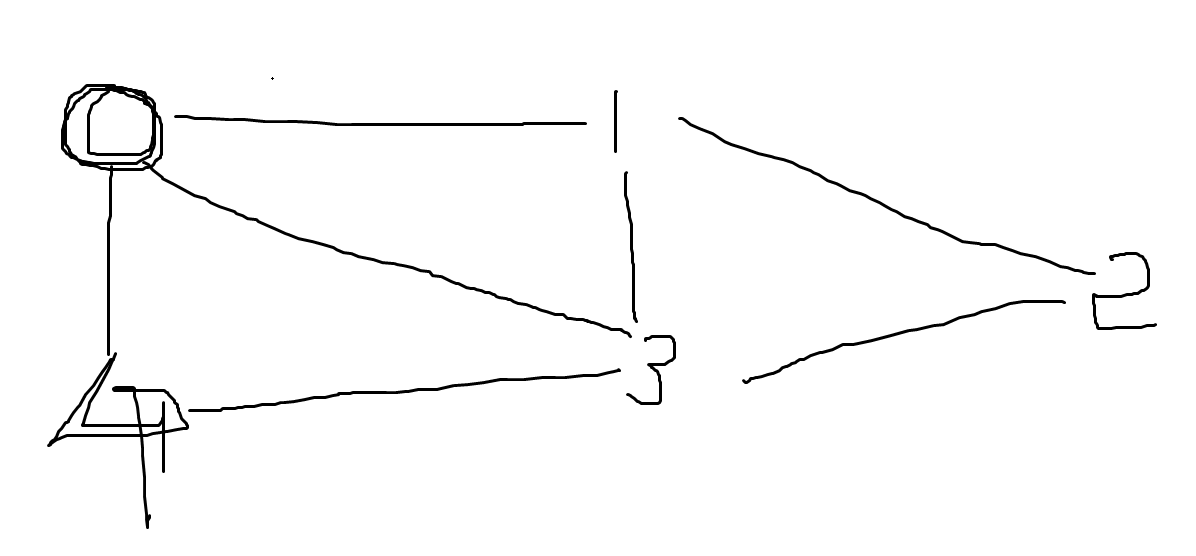




In [99]:
num_nodes = 5
# Edges as a list of tuples
edges = [(0,1),(0,4),(0,3),(1,2),(1,3),(2,3),(3,4)]
print('Number of edges :', len(edges))

Number of edges : 7


Graph Class

In [100]:
# Graph class with adajaceny information as a list
class Graph1:

  def __init__(self,num_nodes,edges):
    self.num_nodes = num_nodes
    self.data =[[] for _ in range(num_nodes)]
    for n1,n2 in edges:
      self.data[n1].append(n2)
      self.data[n2].append(n1)
  
  def __repr__(self):
   return '\n'.join(['{} : {}'.format(idx,neighbor_list) for (idx,neighbor_list) in enumerate(self.data)])
  
  # Print the adjaceny list data
  def __str__(self):
    return self.__repr__()


In [101]:
G1 = Graph1(5,edges)
G1.data

[[1, 4, 3], [0, 2, 3], [1, 3], [0, 1, 2, 4], [0, 3]]

In [102]:
G1

0 : [1, 4, 3]
1 : [0, 2, 3]
2 : [1, 3]
3 : [0, 1, 2, 4]
4 : [0, 3]

In [103]:
print(G1)

0 : [1, 4, 3]
1 : [0, 2, 3]
2 : [1, 3]
3 : [0, 1, 2, 4]
4 : [0, 3]


Graph with adajaceny list as a dictionary

In [104]:
# Graph class with adajaceny information as a dictionary

class Graph2:

  def __init__(self,num_nodes,edges):
    self.num_nodes = num_nodes
    self.data = {}

    for n1,n2 in edges:
      if n1 not in self.data:
        self.data[n1] = []

      if n2 not in self.data:
        self.data[n2] = []

      self.data[n1].append(n2)
      self.data[n2].append(n1)

In [105]:
G1 = Graph2(5,edges)
edges,G1.data

([(0, 1), (0, 4), (0, 3), (1, 2), (1, 3), (2, 3), (3, 4)],
 {0: [1, 4, 3], 1: [0, 2, 3], 2: [1, 3], 3: [0, 1, 2, 4], 4: [0, 3]})

**Classic Problems related to the Graph DS**

These solutions are written based on the **DFS(Depth First Search)** and **BFS(Breadth First Search)** approaches.

# Check if there is a path existing between two nodes in a graph

Core idea : Run either a DFS or a BFS until there  is a  match between the source node and destination node

input  : graph / adjaceny list , src node, dest node

output : bool value ( True or False) 

**Using the DFS Approach**

In [106]:
def check_path_DFS(graph,src,dest):
  stack = [src]
  visited = set()
  result = []
  discovered = [False] * graph.num_nodes
  
  while ( len(stack) > 0):
    current = stack.pop()

    if current in visited:
      continue
 
    visited.add(current)    
    result.append(current)
    if not discovered[current]:
      discovered[current] = True
    
    if current == dest:
      return True

    for neighbour in graph.data[current]:
      if not discovered[neighbour]:
        stack.append(neighbour)

    print(result)
  
  return False

In [107]:
check_path_DFS(G1,1,7)

[1]
[1, 3]
[1, 3, 4]
[1, 3, 4, 0]
[1, 3, 4, 0, 2]


False

**DFS approach with Recursion**

In [108]:
def check_path_DFS_recursion(graph,src,dest,visited = set()):

# This step acts like a termination if there is no match  
# Almost a negative base case
  if src in visited:
    return

# Positive base case    
  if src  == dest:
    return True
  
  visited.add(src)
  print(visited)
  
  for neighbour in graph.data[src]:
    if(check_path_DFS_recursion(graph,neighbour,dest,visited) == True):
      return True
   
  return False

In [109]:
check_path_DFS_recursion(G1,1,4)
# check_path_DFS_recursion(G1,1,5)

{1}
{0, 1}


True

**Using the BFS approach **

**BFS approach with Recursion**


( BFS is often used for detetcing the shortest path within a graph between 2 nodes) 

In [110]:
def check_path_BFS(graph,src,dest):
  visited = set()
  queue = [src]
  discovered = [False] * graph.num_nodes
  discovered[src] = True
  index = 0
  result = []

  while (index < len(queue) ):
    current = queue[index]
    index += 1

    if current in visited:
      continue
    visited.add(current)
    result.append(current)

    if current == dest:
      return True

    for neighbour in graph.data[current]:
      if not discovered[neighbour]:
        discovered[neighbour] = True
        queue.append(neighbour)

    print(result)

  return False  

In [111]:
check_path_BFS(G1,1,7)

[1]
[1, 0]
[1, 0, 2]
[1, 0, 2, 3]
[1, 0, 2, 3, 4]


False

# Number of connected components in a graph 

Core idea : Run the DFS through the adjaceny list and count the number of successful  DFS runs , which gives the number of connected components within the graph

input  : graph / adjaceny list
output : integer count value

In [112]:
def component_search(graph,node,visited):
  if node in visited:
    return False
  
  visited.add(node)
  for neighbour in graph.data[node]:
    component_search(graph,neighbour,visited)

  return True

def connected_components(graph):
  visited = set()
  count  = 0
  for node in graph.data.keys():
    if (component_search(graph,node,visited) == True):
      count += 1

  return count

In [113]:
G1.data

{0: [1, 4, 3], 1: [0, 2, 3], 2: [1, 3], 3: [0, 1, 2, 4], 4: [0, 3]}

In [114]:
connected_components(G1)

1

In [115]:
edges  = [(1,2),(2,3),(1,3),(4,5)]
G2 = Graph2(5,edges)
print(G2.data)

{1: [2, 3], 2: [1, 3], 3: [2, 1], 4: [5], 5: [4]}


In [116]:
connected_components(G2)

2

**Find the max length component**

Core idea : Run the DFS through the graph and find the component with max length

input  : graph / adjaceny list

output : max length integer

In [117]:
def find_component_len(graph,node,visited):
  count = 0
  if node in visited:
    return 0
  
  visited.add(node)
  count += 1

  for neighbour in graph.data[node]:
    count += find_component_len(graph,neighbour,visited)

  return count

def max_component(graph):
  visited = set()
  cur_max = float('-inf')

  for node in graph.data.keys():
    comp_len  = find_component_len(graph,node,visited)
    
    if comp_len > cur_max:
      cur_max = comp_len
  
  return cur_max

In [118]:
# max_component(G1)
# max_component(G2)

print(f'{max_component(G1)} : {max_component(G2)}')

5 : 3


# Finding the shortest path between two nodes in a graph with BFS

input  : graph, src, dest
output : distance integer

In [119]:
def find_shortest_dist(graph,src,dest):
  visited = set()
  queue = [(src,0)]
  discovered = [False] * graph.num_nodes
  discovered[src] = True
  index = 0

  while ( index < len(queue)):
    current = queue[index]
    index += 1

    if current in visited:
      continue
    visited.add(current)

    if current[0] == dest:
      return current[1]

    for  neighbour in graph.data[current[0]]:
      if  not discovered[neighbour]:
        discovered[neighbour] = True
        queue.append((neighbour,current[1] + 1))  
    
  print ('No path exists between given source and destination nodes !! ')

  return -1

In [120]:
find_shortest_dist(G1,1,8)

No path exists between given source and destination nodes !! 


-1

# Island Count - Grid Problem


It is one of the classic problems where DFS can be used witin a grid enviornment to count the number of islands ( graph components)

Steps 

1. Construct the 2-D grid, where each node will be respesented with a (row id,col id) pair


2. Run the DFS on this grid by using each of valid nodes ( land but not water)


In [121]:
grid1 = [ [0 for col in range(5) ] for row in range(5)]
grid1 = [[0 if i % 3 == 0 else 1 for i in range(5)] for i in range(10)]
grid1

[[0, 1, 1, 0, 1],
 [0, 1, 1, 0, 1],
 [0, 1, 1, 0, 1],
 [0, 1, 1, 0, 1],
 [0, 1, 1, 0, 1],
 [0, 1, 1, 0, 1],
 [0, 1, 1, 0, 1],
 [0, 1, 1, 0, 1],
 [0, 1, 1, 0, 1],
 [0, 1, 1, 0, 1]]

In [122]:
def count_island(grid,row_idx,col_idx,visited,count):
  
  # Run the check-points for each input before running the DFS
  row_boarder_check =  row_idx > 0 and row_idx < len (grid)
  col_boarder_check =  col_idx > 0 and col_idx < len (grid[0])
 
  # Check whether it is a valid point
  if row_boarder_check != True or col_boarder_check != True:
    return False
 
 # Check whether it is a water point
  if grid[row_idx][col_idx] == 0:
    return False
  
  # Check whether it is an alerady visited point    
  if (row_idx, col_idx ) in visited:
    return False

  visited.add((row_idx,col_idx))
  
  # Run the check for up, down , left and right poistions of the current point
  count_island(grid,row_idx + 1,col_idx,visited,count)
  count_island(grid,row_idx - 1,col_idx,visited,count)
  count_island(grid,row_idx,col_idx - 1,visited,count)
  count_island(grid,row_idx,col_idx + 1,visited,count)

  return True

def island_count_DFS(grid):
  row = len(grid)
  col = len(grid[0])
  visited = set()
  island_count = 0

  # Parse through each of the row element
  for row_idx in range(row):
    for col_idx in range(col):
      if (count_island(grid,row_idx,col_idx,visited,island_count) == True):
        island_count += 1

  return island_count

In [123]:
island_count_DFS(grid1)

2

**This problem can have multiple flavours - like min size island, max size island, mark the islands with different colors etc ...All these problems can be solved by customizing the above base solution .**